## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [8]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [14]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [15]:
train, test = keras.datasets.cifar10.load_data()

In [16]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x / 128.)-1
    if flatten:
        x = x.reshape((len(x), -1))
#         x_max = np.max(x)
#         x_min = np.min(x)
#         x 
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [17]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)


# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

0.9921875
-1.0


In [23]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 256, 128, 128, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512     
__________

In [24]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [25]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [26]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0421 20:09:51.401763  8752 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0421 20:09:51.464785  8752 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 296us/step - loss: 1.9020 - acc: 0.3149 - val_loss: 1.7013 - val_acc: 0.3824
Epoch 2/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.5935 - acc: 0.4344 - val_loss: 1.5074 - val_acc: 0.4605
Epoch 3/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.4539 - acc: 0.4858 - val_loss: 1.4741 - val_acc: 0.4771
Epoch 4/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.3438 - acc: 0.5256 - val_loss: 1.4237 - val_acc: 0.5017
Epoch 5/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.2538 - acc: 0.5591 - val_loss: 1.3833 - val_acc: 0.5199
Epoch 6/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.1683 - acc: 0.5891 - val_loss: 1.3772 - val_acc: 0.5244
Epoch 7/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.0821 - acc: 0.6171 - val_loss: 1.3817 

50000/50000 [==============================] - 3s 53us/step - loss: 0.0745 - acc: 0.9763 - val_loss: 3.2928 - val_acc: 0.5411
Epoch 60/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.0818 - acc: 0.9743 - val_loss: 3.1533 - val_acc: 0.5455
Epoch 61/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.0715 - acc: 0.9771 - val_loss: 3.1959 - val_acc: 0.5416
Epoch 62/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.0768 - acc: 0.9758 - val_loss: 2.9052 - val_acc: 0.5373
Epoch 63/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.0778 - acc: 0.9757 - val_loss: 3.1518 - val_acc: 0.5491
Epoch 64/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0798 - acc: 0.9749 - val_loss: 3.0444 - val_acc: 0.5431
Epoch 65/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0823 - acc: 0.9738 - val_loss: 3.3038 - val_acc: 0.5441
Epoch 66/100
50000/50000 [==============

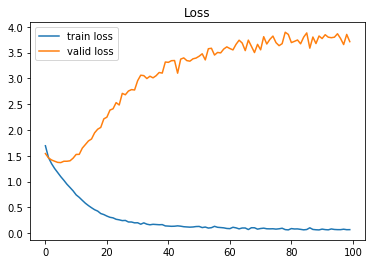

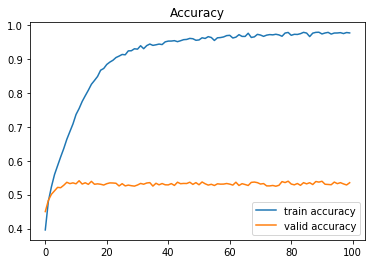

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

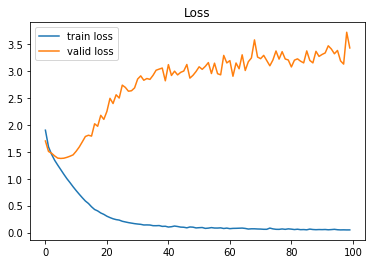

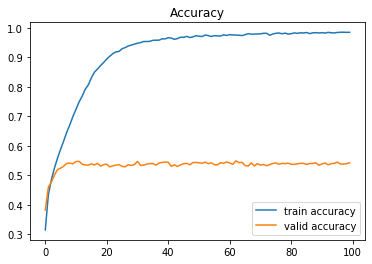

In [28]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()